# 🚀 Co-working Space Occupancy Demo Notebook
ใช้สำหรับ live demo เพื่อนำเสนอการทำงานของระบบ Occupancy Detection + Dashboard + Forecasting

### ฟีเจอร์ใน Notebook นี้
- Run pipeline เพื่ออัปเดตการตรวจจับ
- ดูข้อมูลล่าสุดจาก `usage_stats.csv`
- แสดงสถานะล่าสุด (People, Tables)
- วาดกราฟ (line chart, hourly average)
- Forecast occupancy (เรียก forecast.py)
- (optional) เปิด Dashboard ด้วย Streamlit

In [1]:
# ----------------------------
# Cell 1: Setup (ติดตั้ง libs)
# ----------------------------
%pip install ultralytics opencv-python-headless pandas matplotlib seaborn streamlit schedule scikit-learn statsmodels prophet google-api-python-client google-auth google-auth-oauthlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ----------------------------
# Cell 2: Import + Helper
# ----------------------------
import subprocess, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
# # ----------------------------
# # Cell 3: Run Pipeline (โหลดภาพจาก Drive + Detect)
# # ----------------------------
# def run_pipeline():
#     print("🚀 Running pipeline...")
#     subprocess.run(["python", "pipeline.py"])
#     print("✅ Pipeline finished")

# # รัน 1 ครั้งเพื่อ demo
# run_pipeline()

In [4]:
# ----------------------------
# Cell 4: Load and Clean Data
# ----------------------------
df = pd.read_csv("usage_stats.csv", usecols=[0,1,2,3,4,5])

# parse timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# drop invalid
df = df.dropna(subset=["timestamp"])
df.tail(10)

,timestamp,people_count,table_used,table_total,beanbag_used,beanbag_total
722,2025-09-19 01:31:55,5,1,7,IMG_20250919_013155.jpg,NaN
723,2025-09-19 01:42:05,5,0,7,IMG_20250919_014205.jpg,NaN
724,2025-09-19 01:52:15,4,1,7,IMG_20250919_015215.jpg,NaN
725,2025-09-19 02:02:25,4,0,7,IMG_20250919_020225.jpg,NaN
726,2025-09-19 02:12:34,5,0,7,IMG_20250919_021234.jpg,NaN
727,2025-09-19 02:22:47,4,1,7,IMG_20250919_022247.jpg,NaN
728,2025-09-19 02:32:56,3,1,7,IMG_20250919_023256.jpg,NaN
729,2025-09-19 02:43:07,6,0,7,IMG_20250919_024307.jpg,NaN
730,2025-09-19 02:53:18,3,2,7,IMG_20250919_025318.jpg,NaN
731,2025-09-19 03:03:34,5,1,7,IMG_20250919_030334.jpg,NaN


In [5]:
# ----------------------------
# Cell 5: Current Status
# ----------------------------
latest = df.iloc[-1]
print("👥 People:", int(latest["people_count"]))
print("🪑 Tables Used:", f"{latest['table_used']} / {latest['table_total']}")
print("⏰ Last Update:", latest["timestamp"].strftime("%Y-%m-%d %H:%M:%S"))

👥 People: 5
🪑 Tables Used: 1 / 7
⏰ Last Update: 2025-09-19 03:03:34


c:\Users\wator\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


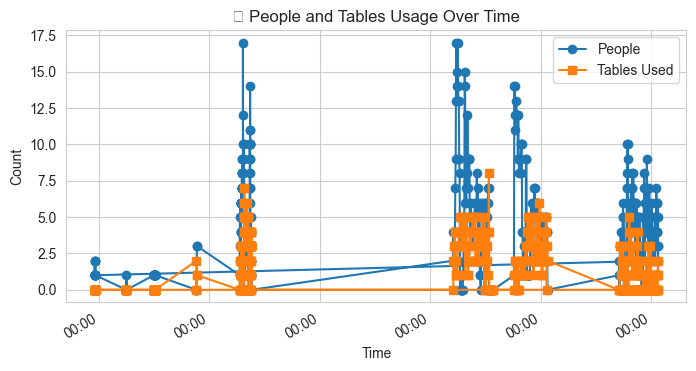

In [6]:
# ----------------------------
# Cell 6: Line Chart (People + Tables)
# ----------------------------
plt.figure(figsize=(8,4))
plt.plot(df["timestamp"], df["people_count"], marker="o", label="People")
plt.plot(df["timestamp"], df["table_used"], marker="s", label="Tables Used")
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("📈 People and Tables Usage Over Time")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.show()

c:\Users\wator\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


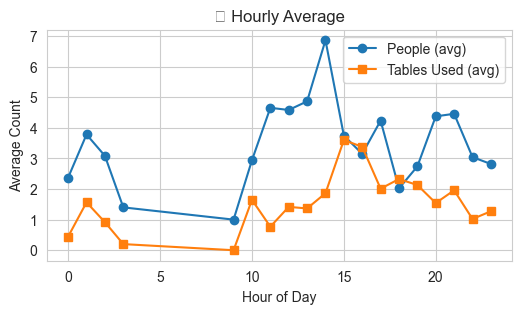

In [7]:
# ----------------------------
# Cell 7: Hourly Average
# ----------------------------
df["hour"] = df["timestamp"].dt.hour
hourly = df.groupby("hour")[["people_count", "table_used"]].mean().reset_index()

plt.figure(figsize=(6,3))
plt.plot(hourly["hour"], hourly["people_count"], marker="o", label="People (avg)")
plt.plot(hourly["hour"], hourly["table_used"], marker="s", label="Tables Used (avg)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.title("⏳ Hourly Average")
plt.legend()
plt.show()

In [8]:
# ----------------------------
# Cell 8: Raw Data
# ----------------------------
df[["timestamp", "people_count", "table_used", "table_total"]].tail(20)

,timestamp,people_count,table_used,table_total
712,2025-09-18 23:50:10,4,2,7
713,2025-09-19 00:00:20,5,1,7
714,2025-09-19 00:10:31,4,0,7
715,2025-09-19 00:20:43,4,0,7
716,2025-09-19 00:30:52,3,0,7
717,2025-09-19 00:41:04,3,0,7
718,2025-09-19 00:51:15,4,0,7
719,2025-09-19 01:01:25,4,1,7
720,2025-09-19 01:11:35,4,0,7
721,2025-09-19 01:21:46,4,0,7


In [10]:
# ----------------------------
# Cell Z: Run Demo Button (Pipeline + Dashboard + Countdown) - With Logs
# ----------------------------
import subprocess, time, threading, os
import ipywidgets as widgets
from IPython.display import display
from pathlib import Path
from datetime import datetime

INTERVAL = 600  # ทุก 10 นาที (600 วินาที)

# ใช้ working directory ปัจจุบันของ notebook
BASE_DIR = Path(os.getcwd())
PIPELINE_FILE = BASE_DIR / "pipeline.py"

# Widgets
step_pipeline = widgets.Checkbox(value=False, description="Run pipeline (initial)", indent=False)
step_dashboard = widgets.Checkbox(value=False, description="Start dashboard", indent=False)
step_loop = widgets.Checkbox(value=False, description="Loop every 10 min", indent=False)
countdown_label = widgets.Label(value="⏳ Waiting...")

log_output = widgets.Textarea(
    value="",
    placeholder="Pipeline logs...",
    description="Logs:",
    layout=widgets.Layout(width="100%", height="250px")
)

box = widgets.VBox([step_pipeline, step_dashboard, step_loop, countdown_label])

def run_dashboard():
    """เปิด Streamlit dashboard (background)"""
    subprocess.Popen(
        ["streamlit", "run", "dashboard.py", "--server.headless", "true", "--server.port", "8501"],
        cwd=BASE_DIR
    )

def run_pipeline_once():
    """รัน pipeline ครั้งเดียว และโชว์ log"""
    log_output.value += f"\n[{datetime.now().strftime('%H:%M:%S')}] 🚀 Running pipeline...\n"
    
    process = subprocess.Popen(
        ["python", str(PIPELINE_FILE)],
        cwd=BASE_DIR,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True,
        encoding="utf-8",     # ✅ เพิ่ม encoding
        errors="replace"      # ✅ ป้องกัน error ถ้าเจอตัวแปลก
    )

    
    # อ่าน log แบบ realtime
    for line in process.stdout:
        log_output.value += f"[{datetime.now().strftime('%H:%M:%S')}] {line}"
    
    process.wait()
    
    if process.returncode == 0:
        log_output.value += f"[{datetime.now().strftime('%H:%M:%S')}] ✅ Pipeline finished.\n"
        step_pipeline.value = True
    else:
        log_output.value += f"[{datetime.now().strftime('%H:%M:%S')}] ❌ Pipeline failed.\n"
        step_pipeline.value = False

def start_demo(_):
    # Reset state
    step_pipeline.value = False
    step_dashboard.value = False
    step_loop.value = False
    countdown_label.value = "⏳ Starting..."

    # 1) Run pipeline ครั้งแรก
    run_pipeline_once()   # ✅ จะติ๊กถูกเองถ้าเสร็จสมบูรณ์

    # 2) Start dashboard (ครั้งเดียว)
    threading.Thread(target=run_dashboard, daemon=True).start()
    step_dashboard.value = True
    log_output.value += f"[{datetime.now().strftime('%H:%M:%S')}] 📊 Dashboard started on http://localhost:8501\n"

    # 3) Loop pipeline ทุก 10 นาที
    step_loop.value = True
    while True:
        step_pipeline.value = False
        for remaining in range(INTERVAL, 0, -1):
            mins, secs = divmod(remaining, 60)
            countdown_label.value = f"   Next run in: {mins:02d}:{secs:02d}"
            time.sleep(1)

        run_pipeline_once()

# ปุ่ม Run
button = widgets.Button(description="▶️ Run Demo", button_style="success")
button.on_click(start_demo)

# แสดงปุ่ม + widget box + log
display(widgets.VBox([button, box, log_output]))
